# Basic Data Summaries and Visualisations:House Price Data

Our data contains a sample of house prices for a major US metropolitan area. In particular, it shows a house's ID, its selling price (in US$), its size (square feet), the number of bedrooms and bathrooms, the number of offers it has received while being on the market,whether or not it has brick walls, and the neighbourhood where it is located. One of the main goals of this analysis is to determine what drives the price of a house. We are going to perform data exploration to better understand our data and get intimately familiar with it.



## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('HousePrices.csv')
df

,ID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


Filtered out the ID column since it adds no value to the summary statistics table we want to generate

In [4]:
df = df.iloc[:,1:]
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,Yes,East
124,147900,2160,4,3,3,Yes,East
125,113500,2070,2,2,2,No,North
126,149900,2020,3,3,1,No,West


## Summary statistics for the house price data

While there are a total of 7 different data columns available, the table below shows summary statistics for only five of them. The reason lies in the differences in the data types. While the first five are numerical, the last two columns are categorical. We cannot compute summary statistics for nonnumeric data.

In [5]:
df.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,26868.770371,211.572431,0.725951,0.514492,1.069324
min,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,211200.000000,2590.000000,5.000000,4.000000,6.000000


Looking at the first column, we can learn that the average(mean)house price is \\$130427. We can also see that the house prices are slightly skewed since the mean price is a bit larger than its median value(50th percentile) \$125950. The most and least expensive houses sold for \\$211200 and \\$69100 respectively. The first quartile implies that 25% of homes have sold for less than \\$111325; similarly the third quartile implies that 75% of homes have sold for more than \\$148250. So there is a considerable variability in house prices. The standard deviation \\$26868 measures the precise amount of this variability.



We can also learn that the typical house has 3 bedrooms and between 2 to 3 bathrooms. Notice that while the median number of baths is 2, its mean is 2.45 which suggests that there a few outliers with a surprisingly large number of bathrooms. In our case, the largest number of bathrooms is 4. The typical house also has a size of 2000 square feet and it appears that the variability in home size (standard deviation) is not very high at 211 square feet. And finally, we also learn that most homes get between two and three offers, however, there also exist some rather unusual homes that have received as many as six offers.

### Frequency tables

We explore categorical data using frequency tables that compare the frequencies between individual categories. For instance, the following table shows that most houses are built from nonbrick material

In [6]:
brick_tab = pd.crosstab(index=df['Brick'], columns="count")
brick_tab

col_0,count
Brick,
No,86
Yes,42


In [7]:
ngbor_tab = pd.crosstab(index=df['Neighborhood'], columns="count")
ngbor_tab

col_0,count
Neighborhood,
East,45
North,44
West,39


### Histogram

While summary statistics are a great way to summarize important aspects about a distribution in a single number, they are limited because they only capture a single aspect of that distribution. Most of the time, data are too complex to be summarised by a single number only. We want to visualize the entire data distribution.

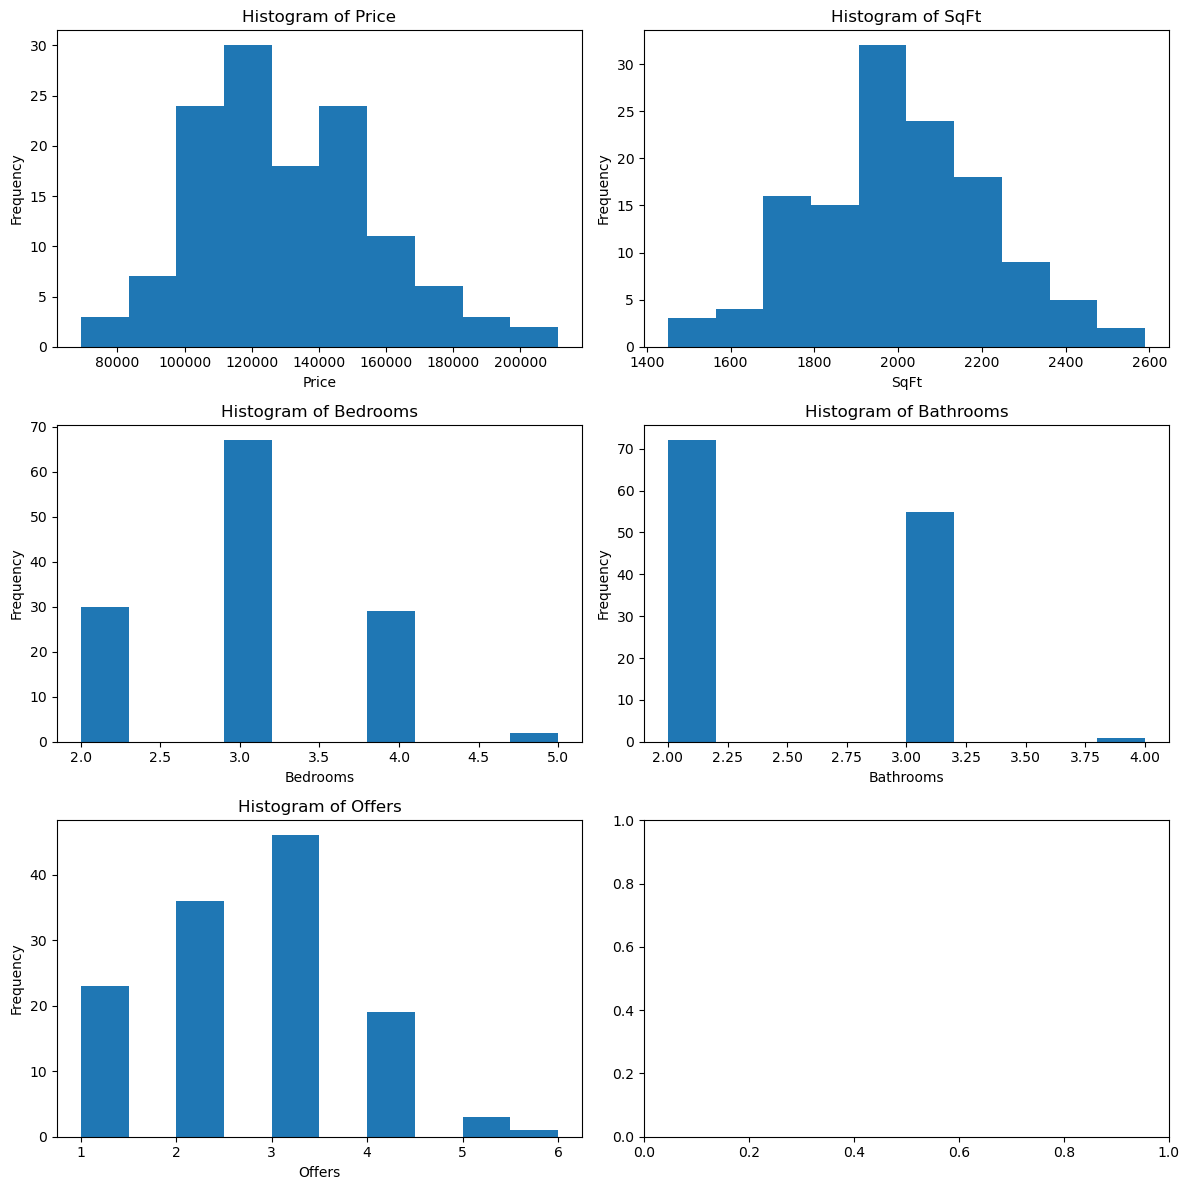

In [23]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
ax[0,0].hist(df.Price)
ax[0,0].set_title("Histogram of Price")
ax[0,0].set(xlabel='Price',ylabel='Frequency')

ax[0,1].hist(df.SqFt)
ax[0,1].set_title("Histogram of SqFt")
ax[0,1].set(xlabel='SqFt',ylabel='Frequency')

ax[1,0].hist(df.Bedrooms)
ax[1,0].set_title("Histogram of Bedrooms")
ax[1,0].set(xlabel='Bedrooms',ylabel='Frequency')

ax[1,1].hist(df.Bathrooms)
ax[1,1].set_title("Histogram of Bathrooms")
ax[1,1].set(xlabel='Bathrooms',ylabel='Frequency')

ax[2,0].hist(df.Offers)
ax[2,0].set_title("Histogram of Offers")
ax[2,0].set(xlabel='Offers',ylabel='Frequency')

plt.tight_layout()
